In [40]:
%matplotlib notebook
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import re


<IPython.core.display.Javascript object>


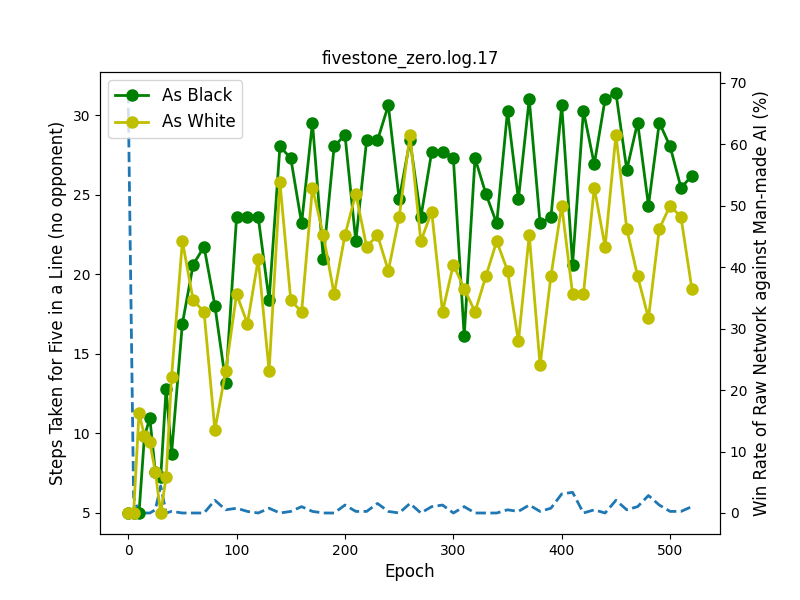

In [58]:
with open("fivestone_zero.log.17","r") as f:
    lines=f.read()
    
avg_step=[(int(i),int(j)/(30*16))\
          for i,j in re.findall("epoch ([0-9]+) with ([0-9]+) datas",lines)]
line_step=[(int(i),float(j))\
          for i,j in re.findall("epoch ([0-9]+) avg win steps: [0-9/]+=([0-9\.]+)",lines)]
win_bk=[(int(i),float(j))\
          for i,j in re.findall("epoch ([0-9]+) nn_color bk: ([0-9\.]+)%",lines)\
          if int(i)%5==0]
win_wt=[(int(i),float(j))\
          for i,j in re.findall("epoch ([0-9]+) nn_color wt: ([0-9\.]+)%",lines)\
          if int(i)%5==0]

fontsize='large' #xx-large
fig=plt.figure(figsize=[8,6],dpi=100)
ax1=fig.subplots(1)
ax2=ax1.twinx()

#ax1.plot([i for i,j in avg_step],[j for i,j in avg_step],'--',
#         markersize=8,linewidth=2)
#ax1.set_ylabel("Average Game Length in self playing",fontsize=fontsize)
ax1.plot([i for i,j in line_step],[j for i,j in line_step],'--',
         markersize=8,linewidth=2)
ax1.set_ylabel("Steps Taken for Five in a Line (no opponent)",fontsize=fontsize)

ax2.plot([i for i,j in win_bk],[j for i,j in win_bk],'-go',
         markersize=8,linewidth=2,label="As Black")
ax2.plot([i for i,j in win_wt],[j for i,j in win_wt],'-yo',
         markersize=8,linewidth=2,label="As White")
ax2.set_ylabel("Win Rate of Raw Network against Man-made AI (%)",fontsize=fontsize)
ax2.legend(fontsize=fontsize)

#plt.xticks(fontsize=fontsize)
#plt.yticks(fontsize=fontsize)
ax1.set_xlabel("Epoch",fontsize=fontsize)
plt.title("fivestone_zero.log.17")

plt.savefig("try17.png")
plt.show()